# 并查集

并查集的直接英文意思是 Merge-find Set, 有时也称为 Union-find Set. 再加上课本的称呼: Disjoint-Set, 大家讲的其实是同一种 ADT. 它的实际含义对我们专业的同学而言是非常简单且基本的: 等价类的划分. 

## 等价关系 (Equivalence Relations)

关系 (relation) 是定义在集合 $S$ 上的一个二元布尔运算 $R$, 即 $\forall a, b \in S$, $a R b$ 的值不是 `True` 就是 `False`. 如果 
$a R b =$ `True`, 我们称 $a$ 和 $b$ 有关系 $R$, 直接记做 $aRb$.

**定义** 称二元关系 $R$ 为**等价关系**, 如果它满足:
1. (自反性, Reﬂexive) $\forall a \in S$, 有 $aRa$.
2. (对称性, Symmetric) $\forall a, b \in S$ 满足 $aRb$, 则必有 $bRa$.
3. (传递性, Transitive) $\forall a, b, c \in S$ 满足 $aRb$ 并且 $bRc$, 则必有 $aRc$.

这个概念在我们的课程中反复出现. 我们就不一一举例了. 

## 动态等价问题

一个基本问题是, 对于给定的等价关系 $\sim$, $\forall a, b \in S$, 判断它们是否等价. 最朴素的做法, 就像基本布尔运算那样, 我们提供 $S$ 集合中全部元素对的真值表, 这样我们只要查表就行了. 且不管制表的空间和时间代价, 大多数时候, 两个元素间是否存在等价关系并不是一目了然的. 比如, 我们有一个五个元素的集合 $\{a_1, a_2, a_3, a_4, a_5\}$, 如果我们已知 $a_1 \sim a_2$, $a_3 \sim a_4$, $a_5 \sim a_1$, $a_4 \sim a_2$, 那么根据等价关系的定义, 显然有这五个元素两两之间都是等价的, 因此我们根本没有必要去做一张 $5 \times 5$ 的真值表. 

课本中的等价类 (equivalence class) 就是我们数学概念中的等价类, 它是 $S$ 中互相等价的元素组成的子集. $S$ 关于不同等价类的划分是唯一的, 也就是我们熟悉的商集: $S / \sim$. 如果我们有 $S$ 的商集, 那么我们可以通过判断两个元素是否处于同一个等价类来判断它们是否等价. 如果我们有合理的算法计算商集, 以及合理的数据结构存储商集, 那么等价类问题的求解效率可以在空间和时间上都得到合理的控制. 

对于初始状态, 输入 $S$ 是一个有 $N$ 个元素的集合, 我们先假设每一个元素都是一个等价类, 或者我们认为所有的等价类都只有一个元素. 我们把这样的初始等价类记做 $S_i$, 这里 $S_i$ 既是 $S$ 的元素, 又是 $S$ 的等价类, $i = 1, 2, \cdots, N$. 当然我们这里 $S$ 都是有限集, 所以不妨设它们的元素都有下标. 注意这里有 
$$
S_i \bigcap S_j = \emptyset, \forall i, j \in \{1, 2, \cdots, N\}.
$$ 
这也是不相交集合类 (disjoint set class) 的原意.

现在有两个可以考虑的操作, 首先是查找 (find), 也即对 $\forall a \in S$, 返回 $S_i$ 满足 $a \in S_i$. 也就是返回给定元素的等价类；其次是合并 (union 或 merge 或 add), 如果我们发现 $a \sim b$, 但是 $a$ 和 $b$ 的等价类不是同一个, 那么显然, 应该将这两个等价类合并成一个等价类. 反复这两个操作, 我们就可以得到我们的正确的等价类划分. 这也是为何这种数据结构有时也被称为 Union-find Set (其实这才是真正的并查集).

这个算法是动态的, 因为 union 操作会数据结构, 影响 find 的结果和效率, 而 find 的结果又可能会导致新的 union. 因此这两个基本过程并不是独立的. 目前基本上有两种策略, 要确保 find 是常数时间效率的, 要么确保 union 是常数时间效率的. 最近的理论研究表明, 这两个基本操作, 不可能都是常数时间效率的. 

比如说, 如果我们直接用一个长度为 $N$ 的数组, $e_i$ 来表示每一个元素的分类. 比如 $S_k = a$, $a$ 是第 $i$ 类, 则 $e_k = i$. $S_m = b$, $b$ 是第 $j$ 类, 于是 $e_m = j$. 这样对已知的类别, 查找的代价是 $\Theta(1)$. 然而, 我们通过等价关系算子判断, $a \sim b$, 于是我们必须把 $i$ 和 $j$ 两类都合并成一个类, 比如都合并成 $j$ 类, 这样我们就必须查找全部的 $e$ 的元素, 把所有标记为 $i$ 的都改为 $j$. 这意味着合并是一个 $\Theta(N)$ 的动作. 于是在最坏可能下, 一个有 $N$ 个元素的集合, 全部逐个元素合并成一个类, 将导致 $\Theta(N^2)$ 的代价. 所以在很少查找, 合并较多的场合, 这个算法不可接受. (但对已经分好类, 不需要合并, 只要查找的场合, 这个结构是可以接受的.) 

这件事也很容易反过来, 比如把所有同一个类的元素, 都放在一个链表中. 这样合并就很快了. 但显然, 查找会变得很低效. 所以似乎查找和合并, 总有一个会低效. 但是一些很细节的处理, 就可以极大改善这一结果. 比如, 我们采用第一种策略, 但跟踪每一个类的总数, 当合并发生时, 总是把小的类向大的类去合并. 仅这样一个细小的改变, 我们就能把合并的总效率(查找不变)改进为 $O(N\log N)$. 因为每一次合并之后, 类的大小都至少增加了一倍. 所以总合并次数不可能是 $\Theta(N)$ 而只是 $\Theta(\log N)$. 

接下去, 课本将介绍一个合并简单, 但查找相对复杂的算法. 但是对至多 $M$ 次查找和 $N$ 次合并, 其效率仅比 $O(M + N)$ 略高一点.

## 基本数据结构

首先我们可以考虑用树来区分不同的类, 也就是所有有相同根节点的元素, 视为一类. 然后这个根节点的值, 就可以作为这个类的名字(代表元). 显然这种结构会导致多棵树, 也就是森林 (forest). 初始情况下, 每一个元素都是单节点的树. 和堆一样, 我们其实没必要用真正的树结构来存放这个森林. 因为每一个节点, 我们都只要记录它的父节点 (parent) 的位置就可以了. 如果它自己就是根节点, 那么它的 parent 就是 $-1$. 所以我们开始可以用一个数组 $s$ (这里为了和课本一致) 来记录全部元素的父节点. 比如对 Figure 8.1 中的初始元素, 我们可以设置
```
for i = 0 to 7
    s[i] = -1;
```

现在当我们合并两个类时, 只需修改其中一个类的根节点就行了, 所以一定是常数时间的. 比如 Figure 8.2 中的合并是 `union(4, 5)`, 那么体现在数据结构中就是 
```
s[5] = 4;
```
这里我们实际采用了向左合并原则, 也就是
```
union(x, y)
    s[y] = x;
```
这种方式显然不是最优的, 但易于实现.

Figure 8.3 中的 `union(6, 7)`, 就是
```
s[7] = 6;
```
Figure 8.4 中的 `union(4, 6)`, 就是
```
s[6] = 4;
```
Figure 8.5 显示了上述操作结束之后的 `s` 数组内容:
```
s|0 |1 |2 |3 |4 |5|6|7|
-|-1|-1|-1|-1|-1|4|4|6|
```

现在 `find` 操作只需返回这个元素的根节点就是了, 也就是说是树高. 然而, 在最坏情况下, 树高是有可能为 $\Theta(N)$ 的 (全部合并成一个类, 且总是向左合并). 显然, 我们需要对树高有所控制, 这就是为什么前面提出要小的类向大的类合并的理由. 在目前情况下, 复杂度为对元素为 $N$ 的集合的连续 $M$ 个操作, 最坏可能性下代价为 $\Theta(M N)$. 具体的代码我们可以参考课本 Figure 8.6 ~ Figure 8.9. 并不难实现.

## 更好的合并策略

对合并策略的一个改进思路我们已经提到了, 就是小的类往大的类合并. 这就要求我们跟踪类中的元素个数, 所以被称为 union-by-size. 如果两个合并的类具有相同的大小, 那么我们仍然可以继续使用"靠左"的规则. 所以我们的例子中的前三次合并和 union-by-size 策略并不矛盾. 然后我们考虑操作 `union(3,4)`, 这个结果就是 Figure 8.10 中显示的. 我们注意到, 如果不采用 union-by-size, 那么得到树就会开始加深. 也就是 Figure 8.11 的结果. 不难证明, 采用了这个策略以后, 树的高度不会超过 $\log N$. Figure 8.12 给出了 $16$ 个节点的最坏可能.

而具体的实施时, 我们考虑到显然最合理存放树中元素个数的地方就是根节点. 目前根节点只存放了一个信息量贫乏的 $-1$ 用来标志根, 着实浪费啊. 我们可以保持其值为负数, 用以表达根的信息, 但是可以存放为 -size, size 是树中元素的个数. 这样不但能直接读取树的元素个数, 还能直接通过两个根节点的比较来判定哪个数是更大的树. 

另一个可以考虑的策略是直接控制树的高度. 也就是我们直接在根节点记录 -height, height 是树的高度, 合并的时候自然是从矮的向高的合并. 这个高度的维护比节点维护更容易的, 因为高度发生变化的唯一情况就是两棵一样高的树合并, 合并之后的高度加 $1$. 这种策略可以称为 union-by-height. Figure 8.13 显示了同一个操作, 在 union-by-size 和 union-by-height 之后的区别. 这个策略的代码实现是 Figure 8.14, 也不难.

## 路径压缩

之前的策略在大多数情况下可以运行良好. 但是, 对于查找次数远多于合并的情形, 它的效率则不如最简单的数组实现. 因为在那个情形, 查找都是常数操作. 可以认为, 合并已经不太有改进空间了, 但是我们仍然可以设法改进查找操作. 

这个想法也很简单, 就是每一次完成 `find(x)` 操作之后, 都把 `x` 的父节点改为这个类的根节点. 从而显著地提升未来对 `x` 及其后继节点的查找效率. 而且这个操作可以在动态过程中不断改进. Figure 8.15 显示了 Figure 8.12 中的树在一次 `find(14)` 之后的变化. 这个被称为路径压缩的策略在代码实现上也非常简单, 参见 Figure 8.16. 它的一个较为重大的影响就是 `find` 过程不再是一个静态过程, 而是会对结构作出修改.  

原则上, 查找中增加路径压缩是和合并相互独立的过程, 也就是理论上任何合并过程, 在采用了路径压缩过程之后都可以显著地改善后续查找效率. 但是在具体实现中, union-by-size 是完全兼容这一策略的, 然而 union-by-height 则不是. 原因很简单. 查找会导致树的结构发生变化, 同时也会影响可能不止一棵树的高度变化. 是否应该, 已经如何高效率地更新这些树的高度, 是一个公开问题. 实际上, 查找/合并问题本身的时间复杂度也是一个公开问题. 所以, 一个建议是, 不要去改变这些树的高度值. 于是这些根节点上存储的高度值, 逐渐就不再是高度, 而只是一种优先度 (rank), 于是, 这种合并策略就改名为 union-by-rank.

## 应用: 迷宫的生成

我们跳过第 8.6 节的理论分析部分, 有兴趣的同学可以自己阅读. 我们直接进入更有趣的环节: 如何利用并查集来产生迷宫. 注意这并不是唯一的迷宫生成算法, 但效果确实不错. 我们的迷宫是一个 $m$ 行 $n$ 列的网格, 每个格子都顺序编了号, 就按书上的例子, 从左到右从上到下依次为 $0$, $1$, $2$, $\cdots$, $m \times n - 1$. 每个格子, 都被四面墙围住, 除了左上角编号为 $0$ 的格子的左墙和右下角编号为 $m \times n - 1$ 的格子的右墙以外. 

现在我们随机选取一面内墙(即除了最外围一圈墙以外的任何一块墙), 它必然和两个格子相邻, 如果这两个相邻的格子并不相通, 则将这堵墙拆掉. 如此重复, 直到:
1. 左上角和右下角的格子有通路, 或者
2. 全部的格子两两都有通路.
一般来说, 第 2 条终止策略产生的迷宫更加具有迷惑性. 

这里, 两个格子是否等价的判定就是这两个格子是否相通. 初始情况, 全部墙都在, 全部格子都是自成一类的. 然后每一次随机取墙, 我们都需要查找墙两侧的格子是否属于同一类, 如果不是, 拆掉墙, 同时应该合并它们各自所属的类. 由此并查过程和随机拆墙挂钩. 第 1 种终止策略要求当 $0$ 号和 $m \times n - 1$ 号格子是同一类时终止；而第 2 种终止策略就是要求全部格子都在一个类时再终止.

这个必须做个作业了.

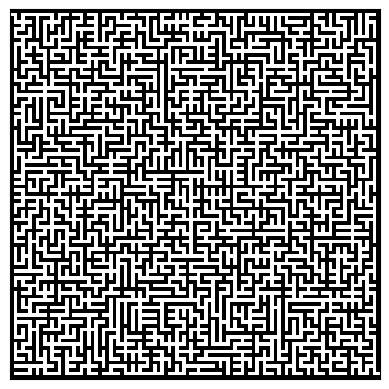

In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt

class UnionFind:
    def __init__(self, size):
        self.parent = [-1] * size

    def find(self, i):
        if self.parent[i] < 0:
            return i
        else:
            self.parent[i] = self.find(self.parent[i])
            return self.parent[i]

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)

        if root_x != root_y:
            if self.parent[root_x] < self.parent[root_y]:
                self.parent[root_x] += self.parent[root_y]
                self.parent[root_y] = root_x
            else:
                self.parent[root_y] += self.parent[root_x]
                self.parent[root_x] = root_y

def generate_maze(m, n, mode):
    # Initialize Union-Find structure and maze
    uf = UnionFind(m * n)
    maze = np.ones((2*m+1, 2*n+1))  # +1 for the walls

    # Openings for maze
    maze[1, 0] = maze[2*m-1, 2*n] = 0
    for i in range(m):
        for j in range(n):
            maze[2 * i + 1, 2 * j + 1] = 0

    # List of walls
    walls = []
    for i in range(m):
        for j in range(n):
            if i < m-1: walls.append(("h", i, j))  # horizontal walls
            if j < n-1: walls.append(("v", i, j))  # vertical walls

    random.shuffle(walls)  # Randomize walls

    while walls:
        wall = walls.pop()
        if wall[0] == "h":  # horizontal wall
            cell1 = wall[1]*n + wall[2]
            cell2 = (wall[1]+1)*n + wall[2]
            if uf.find(cell1) != uf.find(cell2):  # Check if it connects two sets
                maze[2*wall[1]+2, 2*wall[2]+1] = 0  # Remove wall
                uf.union(cell1, cell2)

        else:  # vertical wall
            cell1 = wall[1]*n + wall[2]
            cell2 = wall[1]*n + (wall[2]+1)
            if uf.find(cell1) != uf.find(cell2):  # Check if it connects two sets
                maze[2*wall[1]+1, 2*wall[2]+2] = 0  # Remove wall
                uf.union(cell1, cell2)

        # Check termination condition
        if mode == 1 and uf.find(0) == uf.find(m*n-1):  # Mode 1
            break
        if mode == 2 and all(uf.find(0) == uf.find(i) for i in range(1, m*n)):  # Mode 2
            break

    # Draw the maze
    plt.imshow(maze, cmap='binary')
    plt.xticks([]), plt.yticks([])  # Hide axes
    plt.show()

    return maze

# Example usage: 5x5 maze, mode 2
maze = generate_maze(50, 50, 2)


In [13]:
maze


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
m

NameError: name 'm' is not defined

In [24]:
for i in range(3):
    print(i)

0
1
2
